In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Calibrating the Wflow Model

The Wflow model will be calibrated to the discharge data of gauge 2FC19 at Egerton University. Several parameters are adjusted in the calibration process.

In [2]:
## default run

path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\Nakuru_res0.002dg_complete_chirps"
run = "run_default"
output_def = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
output_def = output_def.loc[output_def.index <= "2020-06-30"]

rainfall = pd.read_csv(os.path.join(path, "mean_rainfall_Egerton_gauge_timeseries.csv"), sep=",", header=0, index_col=0, parse_dates=True)


In [3]:

rainfall = rainfall['2016-01-03':'2020-06-30']
display(rainfall)


,spatial_ref,precip
time,,
2016-01-03,0,0.0
2016-01-04,0,0.0
2016-01-05,0,0.0
2016-01-06,0,0.0
2016-01-07,0,0.0
...,...,...
2020-06-26,0,0.0
2020-06-27,0,0.0
2020-06-28,0,0.0


,Discharge (m3/s) 2FC19
date,
2007-01-01,30.588159
2007-01-02,18.790216
2007-01-03,10.950588
2007-01-04,6.593246
2007-01-05,5.977506
...,...
2020-06-26,5.140952
2020-06-27,5.140952
2020-06-28,4.883957


Discharge (m3/s) 2FC19    4639.099618
dtype: float64


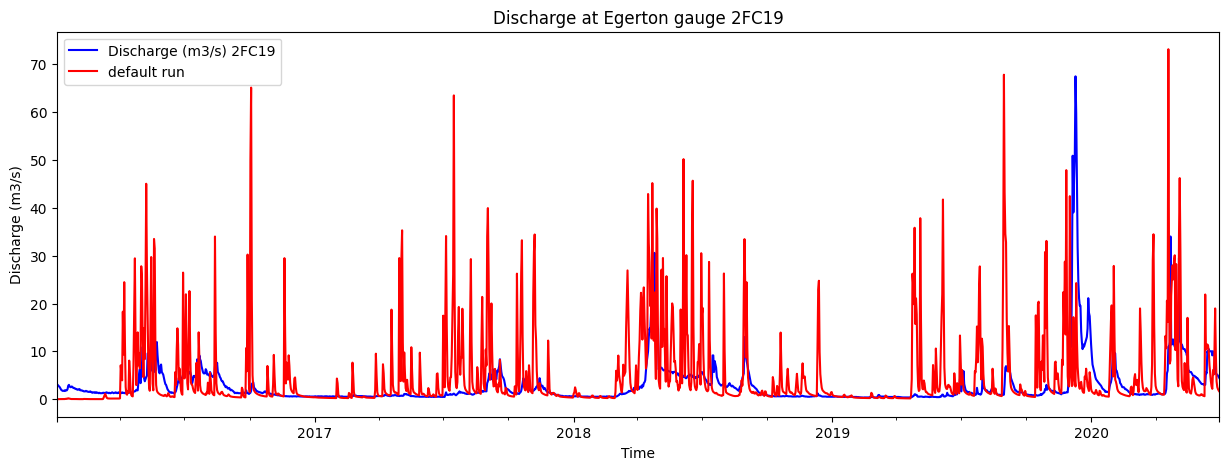

In [4]:
# Discharge data

### loading discharge data from the Njoro river gauging station 2FC19

Egerton_2fc19 = pd.read_excel(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\daily_discharge.xlsx")

Egerton_2fc19.set_index('date', inplace=True)
Egerton_2fc19 = Egerton_2fc19.rename(columns={'daily_discharge' : 'Discharge (m3/s) 2FC19'})
display(Egerton_2fc19['2007-01-01':])

Egerton_2fc19_short = Egerton_2fc19.loc[Egerton_2fc19.index >= '2016-01-03']
#display(Egerton_2fc19_short)
print(Egerton_2fc19_short.sum())

#display(output_def['Q_1.2'])
#print(output_def['Q_1.2'].sum())

Egerton_2fc19_short.plot(figsize=(20, 5), color='blue', label='Discharge data')
output_def['Q_1'].plot(figsize=(15,5), color='red', label='default run')
plt.legend()
plt.title('Discharge at Egerton gauge 2FC19')
plt.xlabel('Time')
plt.ylabel('Discharge (m3/s)'); 

<Axes: xlabel='date'>

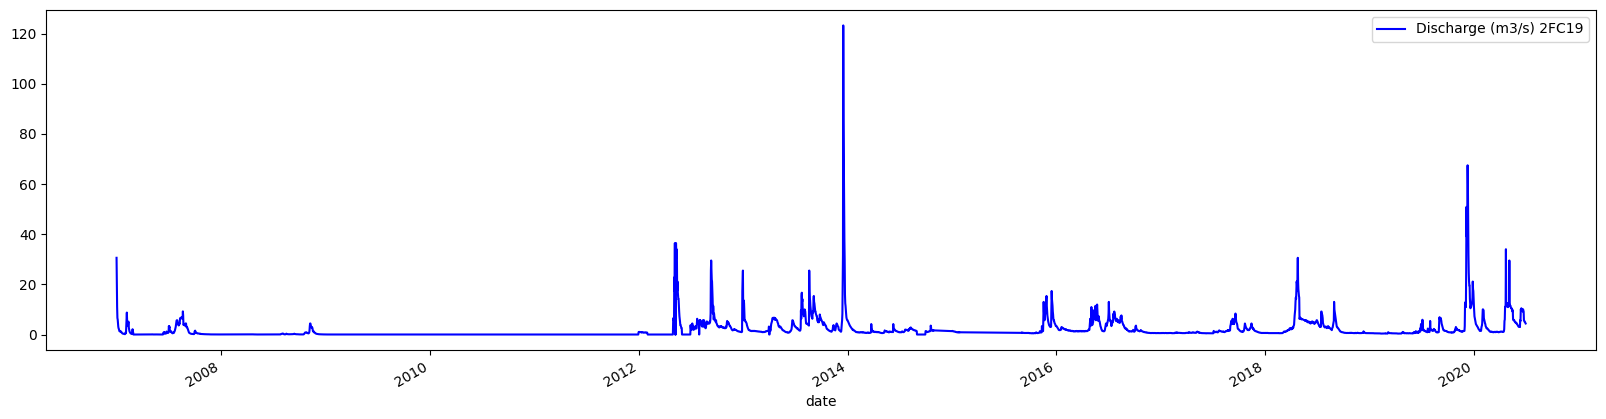

In [5]:
Egerton_2fc19['2007-01-01':].plot(figsize=(20, 5), color='blue', label='Discharge data')

## KsatHorfrac

In [6]:
# #run_list = ["run_ksathorfracx10", "run_ksathorfracx5", "run_ksathorfracx2"]
# #run_list = ["run_ksathorfracx10", "run_ksathorfracx5", "run_ksathorfracx2", "run_ksathorfracx0.5"]
# #run_list = [ "run_ksathorfracx5", "run_ksathorfracx2"]
# #run_list = ["run_ksathorfracx2"]
# run_list = ["run_ksathorfracx10", "run_ksathorfracx2"]
# #scale_list = [2,5,10]
# output_ksathorfracx = []

# end_date = pd.to_datetime("2020-06-30")

# plt.figure(figsize=(18, 5))

# for run in run_list:
#     df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
#     df = df[df.index <= end_date]  # Filter to end date
#     output_ksathorfracx.append(df)
#     plt.plot(df.index, df['Q_1.2'], label=run, alpha=0.5)
#     print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"].sum()*86400:.2e} m3')

# #plt.plot(output_def.index, output_def['Q_1.2'], label='default run', alpha=0.5)
# plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge') 
# print(f'The sum of the observed discharge is {Egerton_2fc19_short.values.sum()*86400:.2e} m^3.')  

# plt.xlabel("Date")
# plt.ylabel("Discharge (Q_1.2)")
# plt.legend()
# plt.title("Discharge for Different ksathorfrac Scaling")
# plt.show()

# #display(output_ksathorfracx[0])


## KsatVer

In [7]:
# run_list = ["run_ksatverx10", "run_ksatverx5", "run_ksatverx2"]
# #run_list = [ "run_ksathorfracx5", "run_ksathorfracx2"]
# #run_list = ["run_ksathorfracx2"]
# #run_list = ["run_ksathorfracx10"]
# #scale_list = [2,5,10]
# output_ksatverx = []

# end_date = pd.to_datetime("2020-06-30")

# plt.figure(figsize=(18, 5))

# for run in run_list:
#     df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
#     df = df[df.index <= end_date]  # Filter to end date
#     output_ksatverx.append(df)
#     plt.plot(df.index, df['Q_1.2'], label=run)
#     print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"].sum()*86400:.2e} m3')

# plt.plot(output_def.index, output_def['Q_1'], label='default run')
# plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge') 
# print(f'The sum of the observed discharge is {Egerton_2fc19_short.values.sum()*86400:.2e} m^3.')  

# plt.xlabel("Date")
# plt.ylabel("Discharge (Q_1.2)")
# plt.legend()
# plt.title("Discharge for Different ksatver Scaling")
# plt.show()

## f

In [8]:
# run_list = ["run_fx0.1", "run_fx0.01"]
# run_list = ["run_fx0.06", "run_fx0.1", "run_fx0.15", "run_fx0.3"]
# #run_list = ["run_fx0.1"]
# #run_list = ["run_fx0.06", "run_fx0.07", "run_fx0.08", "run_fx0.09", "run_fx0.1"]
# #run_list = ["run_fx0.06", "run_fx0.07"]
# run_list = ["run_fx0.3"]

# output_f = []

# end_date = pd.to_datetime("2020-06-30")

# plt.figure(figsize=(18, 5))

# for run in run_list:
#     df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
#     df = df[df.index <= end_date]  # Filter to end date
#     output_f.append(df)
#     plt.plot(df.index, df['Q_1.2'], label=run)
#     print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"]["2017-01-01":].sum()*86400:.2e} m3')

# plt.plot(output_def.index, output_def['Q_1'], label='default run', alpha=0.5)
# plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
# print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
# print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

# plt.xlabel("Date")
# plt.ylabel("Discharge (Q_1.2)")
# plt.legend()
# plt.title("Discharge for Different f Scaling")
# plt.show()

## f*0.09 is selected for further calibration
With a reduced f, the vertical hydraulic conductivity decreases less over depth. This allows more infiltration.
This will be combined with adjusting:
- Layer thickness (top layer *1.5, 2, 3). This aims to allow more infiltration in the top layer
- Rooting depth of vegetation. This aims to increase evaporation, while an increased amount of water is infiltrated.
- N_land (*1.2, 1.3, 1.5). This aims to slow down runoff and allow more water to infiltrate + evaporate.

### Layer thickness of the Top Soil Layer (*1.5, *2, *3)

In [9]:

# run_list = ["run_fx0.09_laythick_topx1.5", "run_fx0.09_laythick_topx2", "run_fx0.09_laythick_topx3"]

# output_f_laythick = []

# end_date = pd.to_datetime("2020-06-30")

# plt.figure(figsize=(18, 5))

# for run in run_list:
#     df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
#     df = df[df.index <= end_date]  # Filter to end date
#     output_f_laythick.append(df)
#     plt.plot(df.index, df['Q_1.2'], label=run)
#     print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"]["2017-01-01":].sum()*86400:.2e} m3')

# #plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
# plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
# print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
# print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

# plt.xlabel("Date")
# plt.ylabel("Discharge (Q_1.2)")
# plt.legend()
# plt.title("Discharge for Different combined f and layerthickness Scaling")
# plt.show()

### Layer thickness of the Mid Soil Layer (*0.8, *0.6, *0.4)

In [10]:

# #run_list = ["run_fx0.09_laythick_midx0.8", "run_fx0.09_laythick_midx0.6", "run_fx0.09_laythick_midx0.4", "run_fx0.09"]
# run_list = ["run_fx0.09_laythick_midx0.4", "run_fx0.09"]
# output_f_laythick = []

# end_date = pd.to_datetime("2020-06-30")

# plt.figure(figsize=(18, 5))

# for run in run_list:
#     df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
#     df = df[df.index <= end_date]  # Filter to end date
#     output_f_laythick.append(df)
#     plt.plot(df.index, df['Q_1.2'], label=run)
#     print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"]["2017-01-01":].sum()*86400:.2e} m3')

# #plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
# plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
# print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
# print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

# plt.xlabel("Date")
# plt.ylabel("Discharge (Q_1.2)")
# plt.legend()
# plt.title("Discharge for Different combined f and layerthickness Scaling")
# plt.show()

### Rooting depth (*1.2, 1.5, 2)

In [11]:

# #run_list = ["run_fx0.09_laythick_midx0.8", "run_fx0.09_laythick_midx0.6", "run_fx0.09_laythick_midx0.4", "run_fx0.09"]
# run_list = ["run_fx0.09_rootingdepth_x1.2", "run_fx0.09_rootingdepth_x1.5", "run_fx0.09_rootingdepth_x2", "run_fx0.09"]
# output_f_rootingd = []

# end_date = pd.to_datetime("2020-06-30")

# plt.figure(figsize=(18, 5))

# for run in run_list:
#     df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
#     df = df[df.index <= end_date]  # Filter to end date
#     output_f_rootingd.append(df)
#     plt.plot(df.index, df['Q_1.2'], label=run)
#     print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"]["2017-01-01":].sum()*86400:.2e} m3')

# #plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
# plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
# print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
# print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

# plt.xlabel("Date")
# plt.ylabel("Discharge (Q_1.2)")
# plt.legend()
# plt.title("Discharge for Different combined f and rootingdepth Scaling")
# plt.show()

### N Land (*1.2, 1.3, 1.4)

In [12]:

# #run_list = ["run_fx0.09_laythick_midx0.8", "run_fx0.09_laythick_midx0.6", "run_fx0.09_laythick_midx0.4", "run_fx0.09"]
# run_list = ["run_fx0.09_N_land_x1.2", "run_fx0.09_N_land_x1.3", "run_fx0.09_N_land_x1.4", "run_fx0.09"]
# output_f_N_land = []

# end_date = pd.to_datetime("2020-06-30")

# plt.figure(figsize=(18, 5))

# for run in run_list:
#     df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
#     df = df[df.index <= end_date]  # Filter to end date
#     output_f_N_land.append(df)
#     plt.plot(df.index, df['Q_1.2'], label=run)
#     print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"]["2017-01-01":].sum()*86400:.2e} m3')

# #plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
# plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
# print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
# print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

# plt.xlabel("Date")
# plt.ylabel("Discharge (Q_1.2)")
# plt.legend()
# plt.title("Discharge for Different combined f and N_land Scaling")
# plt.show()

### Theta S (*2, 3, 4)

The sum of the modeled discharge of run_fx0.09_thetas_x2 is 4.89e+08 m3
The sum of the modeled discharge of run_fx0.09_thetas_x3 is 3.97e+08 m3
The sum of the modeled discharge of run_fx0.09_thetas_x4 is 3.05e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


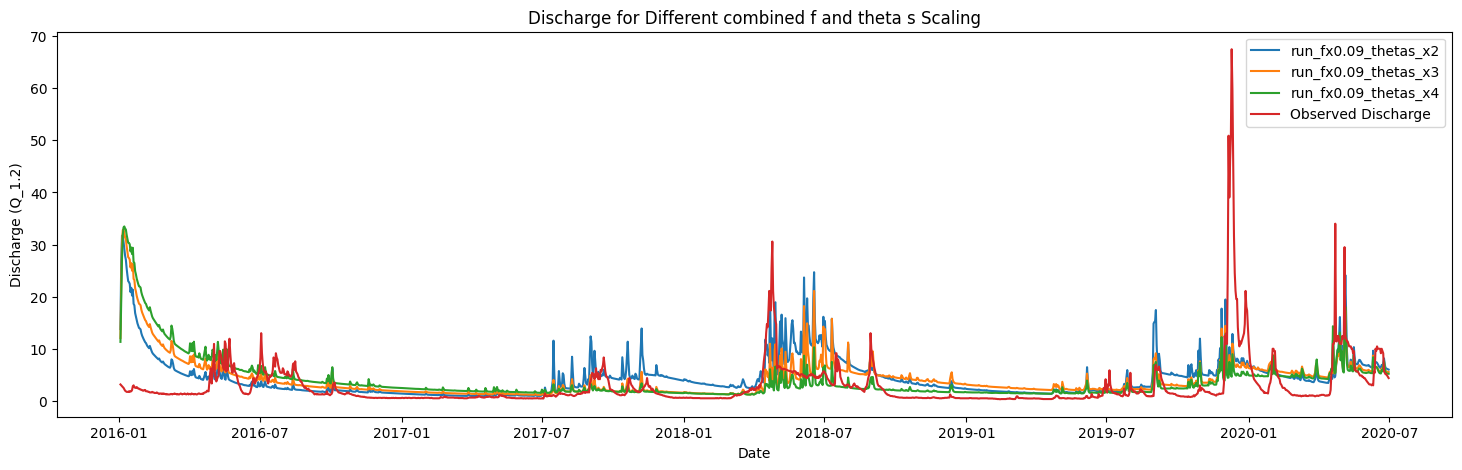

In [13]:

#run_list = ["run_fx0.09_laythick_midx0.8", "run_fx0.09_laythick_midx0.6", "run_fx0.09_laythick_midx0.4", "run_fx0.09"]
#run_list = ["run_fx0.09_thetas_x2", "run_fx0.09_thetas_x3", "run_fx0.09_thetas_x4", "run_fx0.09"]
run_list = ["run_fx0.09_thetas_x2", "run_fx0.09_thetas_x3", "run_fx0.09_thetas_x4"]
output_f_thetas = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_f_thetas.append(df)
    plt.plot(df.index, df['Q_1.2'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1.2)")
plt.legend()
plt.title("Discharge for Different combined f and theta s Scaling")
plt.show()

## Observations from calibtration

The runs with asjusted thetas S in combination with fx0.09 result in too much baseflow in the hydrograph. Also, the peaks are too low / shifted too much in time. Since the runs with Theta S decrease the cumulative discharge, the simulation will be repeated with adjusted f. The scaling factors f = 0.2, 0.25 and 0.3 will be simualted, combined with Theta_s x3. The runs with fx0.15 and fx0.3 show higher peaks and lower basedflow  than the runs with fx0.09. Therefore, it is expected that the adjsuted f factor will result in a steeper hydrograph. 

### Theta S (*3) and f (*0.2, 0.25 and 0.3)

The sum of the modeled discharge of run_fx0.3_thetas_x3 is 4.87e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


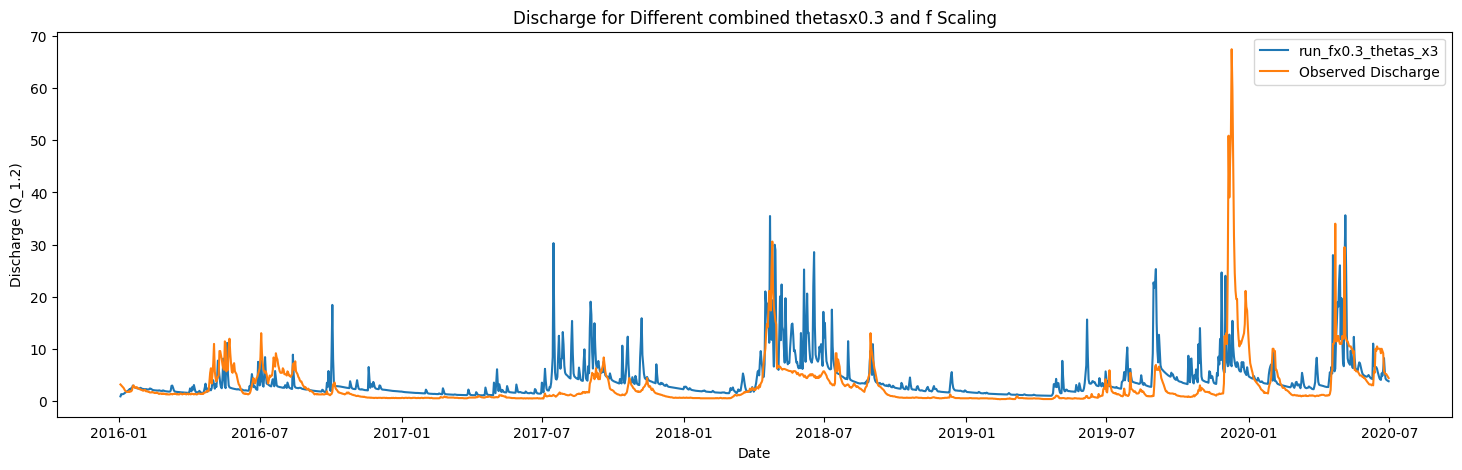

In [14]:
#run_list = ["run_fx0.2_thetas_x3", "run_fx0.25_thetas_x3", "run_fx0.3_thetas_x3"]
#run_list = ["run_fx0.09_thetas_x2", "run_fx0.09_thetas_x3"]
run_list = ["run_fx0.3_thetas_x3"]
output_f_thetasx3 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_f_thetasx3.append(df)
    plt.plot(df.index, df['Q_1.2'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1.2)")
plt.legend()
plt.title("Discharge for Different combined thetasx0.3 and f Scaling")
plt.show()

### Theta S (*4) and f (*0.2, 0.25 and 0.3)

The sum of the modeled discharge of run_fx0.25_thetas_x4 is 4.62e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


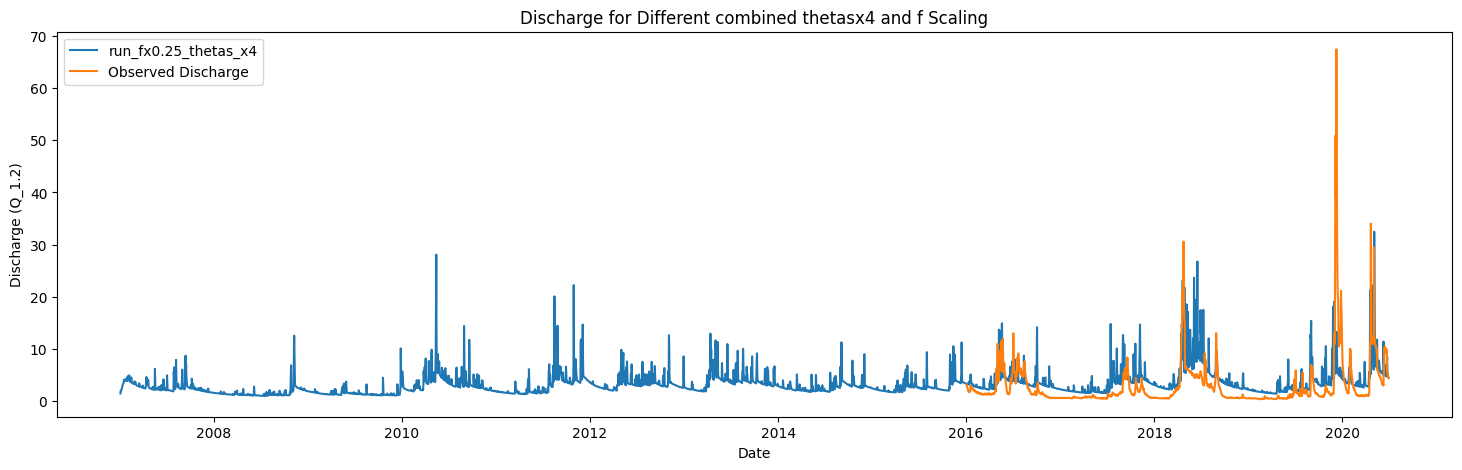

In [15]:
#run_list = ["run_fx0.2_thetas_x3", "run_fx0.25_thetas_x3", "run_fx0.3_thetas_x3"]
#run_list = ["run_fx0.09_thetas_x2", "run_fx0.09_thetas_x3"]
run_list = ["run_fx0.2_thetas_x4", "run_fx0.25_thetas_x4", "run_fx0.3_thetas_x4"]
run_list = ["run_fx0.25_thetas_x4"]
output_f_thetasx4 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_f_thetasx4.append(df)
    plt.plot(df.index, df['Q_1.2'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1.2"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1.2)")
plt.legend()
plt.title("Discharge for Different combined thetasx4 and f Scaling")
plt.show()

### Theta_s (*4), f (*0.2) and ksathorfrac (*0.5, 0.2, 0.1)

The sum of the modeled discharge of run_fx0.2_ts_x4_ksathorx0.1 is 4.47e+08 m3
The sum of the modeled discharge of run_fx0.2_ts_x4_ksathorx0.5 is 4.57e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


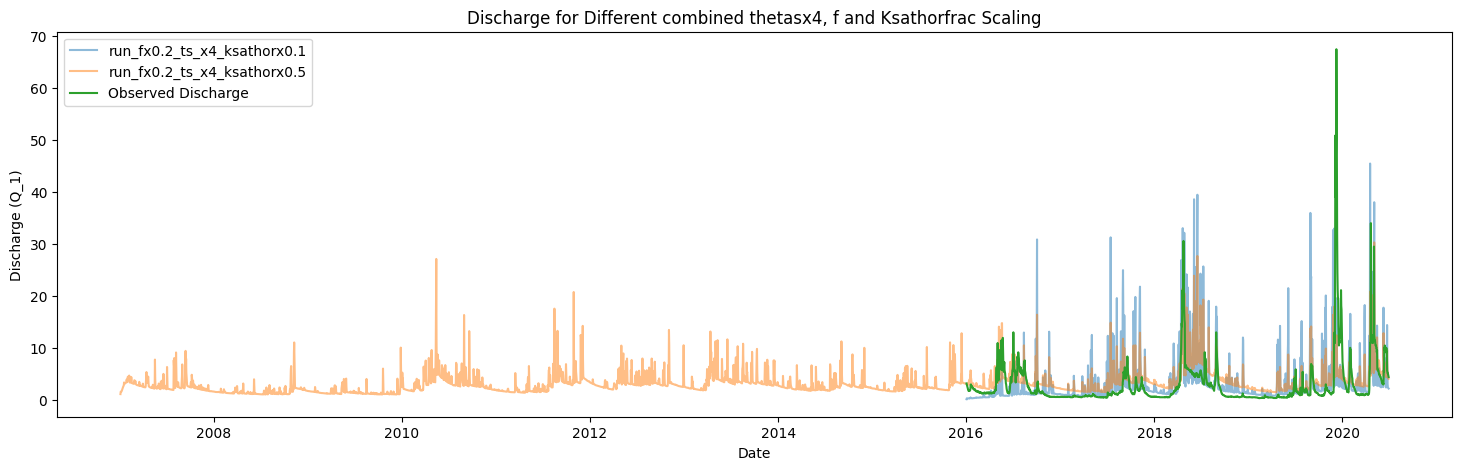

In [16]:
#run_list = ["run_fx0.2_thetas_x3", "run_fx0.25_thetas_x3", "run_fx0.3_thetas_x3"]
#run_list = ["run_fx0.09_thetas_x2", "run_fx0.09_thetas_x3"]
#run_list = ["run_fx0.2_thetas_x4", "run_fx0.25_thetas_x4", "run_fx0.3_thetas_x4"]
run_list = ["run_fx0.2_ts_x4_ksathorx0.5", "run_fx0.2_ts_x4_ksathorx0.2", "run_fx0.2_ts_x4_ksathorx0.1"]
run_list = ["run_fx0.2_ts_x4_ksathorx0.1", "run_fx0.2_ts_x4_ksathorx0.5"]
output_f_tsx4_ksathorfrac = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_f_tsx4_ksathorfrac.append(df)
    plt.plot(df.index, df['Q_1'], alpha=0.5, label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for Different combined thetasx4, f and Ksathorfrac Scaling")
plt.show()

### f is chosen at (*0.1) combined with Theta S (*2,3,4,5)

The sum of the modeled discharge of run_fx0.1_thetas_x2 is 4.93e+08 m3
The sum of the modeled discharge of run_fx0.1_thetas_x3 is 4.08e+08 m3
The sum of the modeled discharge of run_fx0.1_thetas_x4 is 3.21e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


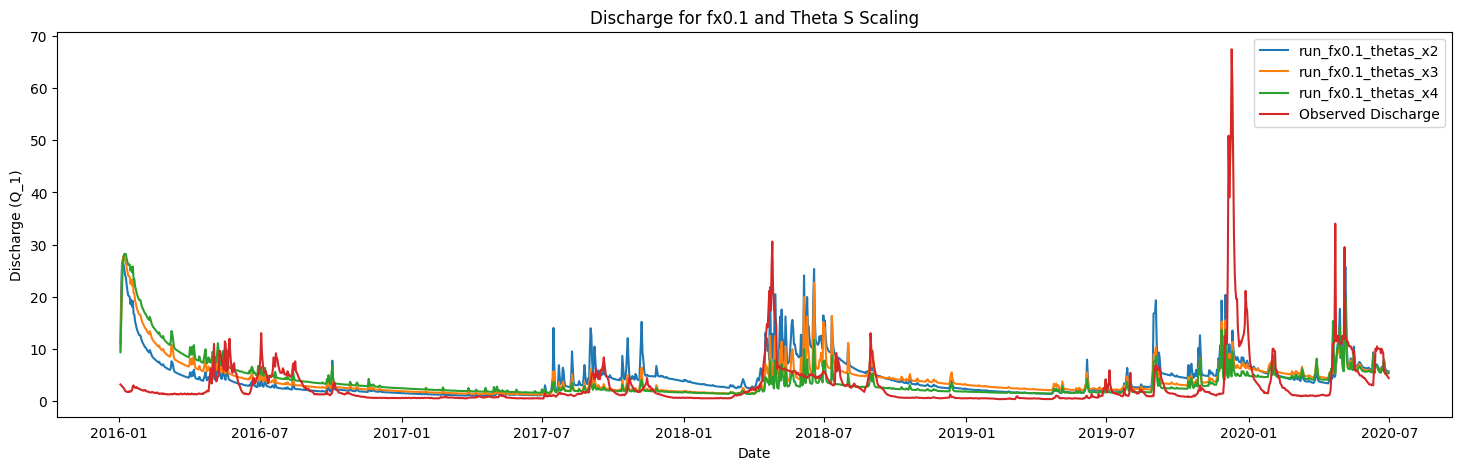

In [17]:
run_list = ["run_fx0.1_thetas_x2", "run_fx0.1_thetas_x3", "run_fx0.1_thetas_x4"]
#run_list = ["run_fx0.1_thetas_x2"]
output_fx0_1_thetas = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_fx0_1_thetas.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fx0.1 and Theta S Scaling")
plt.show()

### Theta S (*2,3,4)

The sum of the modeled discharge of run_thetas_x2 is 4.99e+08 m3
The sum of the modeled discharge of run_thetas_x3 is 4.71e+08 m3
The sum of the modeled discharge of run_thetas_x4 is 4.44e+08 m3
The sum of the modeled discharge of run_thetas_x5 is 4.21e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


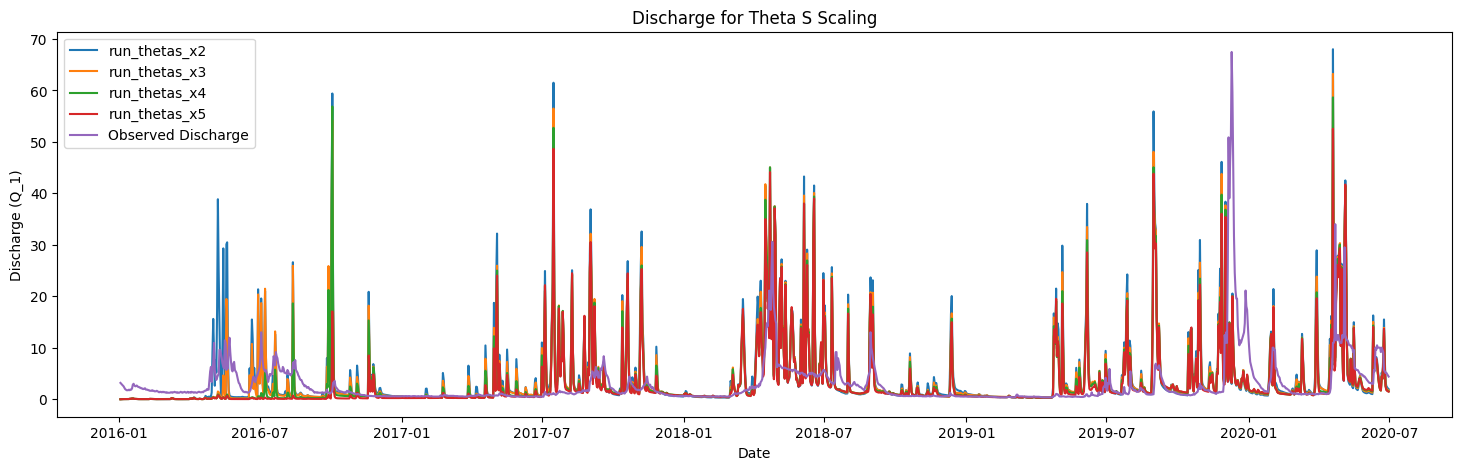

In [18]:
run_list = ["run_thetas_x2", "run_thetas_x3", "run_thetas_x4", "run_thetas_x5"]
#run_list = ["run_fx0.1_thetas_x2"]
#run_list = ["run_thetas_x5"]
output_thetas = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_thetas.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1.2'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for Theta S Scaling")
plt.show()

## Focus on four parameters: f, theta s, ksatver and ksathorfrac

Those parameters will be combined in simulations:
1. f *0.5 + theta_s *4 + ksatver *2, 3, 5
2. f *0.5 + theta_s *3, 4, 5 + ksatver *3
3. f *0.4, 0.6 + theta_s *4 + ksatver *3

### 1. Varying ksatver

The sum of the modeled discharge of run_fx0.5_ts_x4_ksatverx2 is 4.80e+08 m3
The sum of the modeled discharge of run_fx0.5_ts_x4_ksatverx3 is 4.86e+08 m3
The sum of the modeled discharge of run_fx0.5_ts_x4_ksatverx5 is 4.96e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


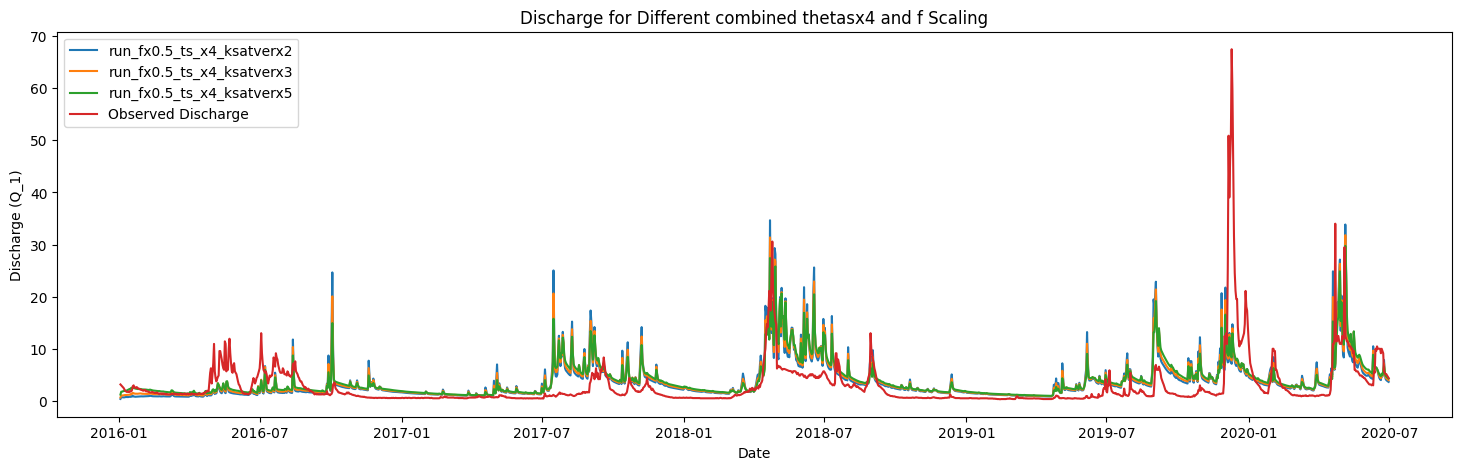

In [19]:
#run_list = ["run_fx0.5_ts_x4_ksatverx2", "run_fx0.5_ts_x4_ksatverx3", "run_fx0.5_ts_x4_ksatverx5"]
run_list = ["run_fx0.5_ts_x4_ksatverx2", "run_fx0.5_ts_x4_ksatverx3", "run_fx0.5_ts_x4_ksatverx5"]
#run_list = ["run_fx0.2_thetas_x4"]
output_4_ksatver = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_4_ksatver.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for Different combined thetasx4 and f Scaling")
plt.show()

### 2. Varying Theta S

The sum of the modeled discharge of run_fx0.5_ts_x3_ksatverx3 is 5.11e+08 m3
The sum of the modeled discharge of run_fx0.5_ts_x5_ksatverx3 is 4.64e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


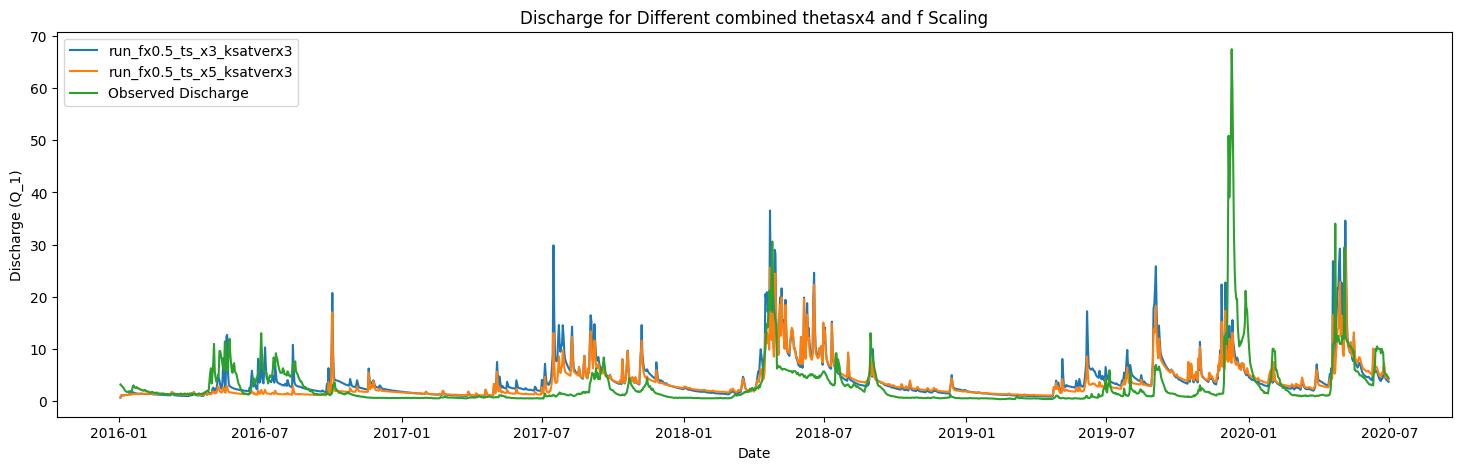

In [20]:
run_list = ["run_fx0.5_ts_x3_ksatverx3", "run_fx0.5_ts_x5_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_4_thetas = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_4_thetas.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for Different combined thetasx4 and f Scaling")
plt.show()

### Varying f

The sum of the modeled discharge of run_fx0.4_ts_x4_ksatverx3 is 4.80e+08 m3
The sum of the modeled discharge of run_fx0.6_ts_x4_ksatverx3 is 4.86e+08 m3
The sum of the observed discharge is 3.14e+08 m^3.
The sum of the modeled discharge is 5.62e+08 m^3.


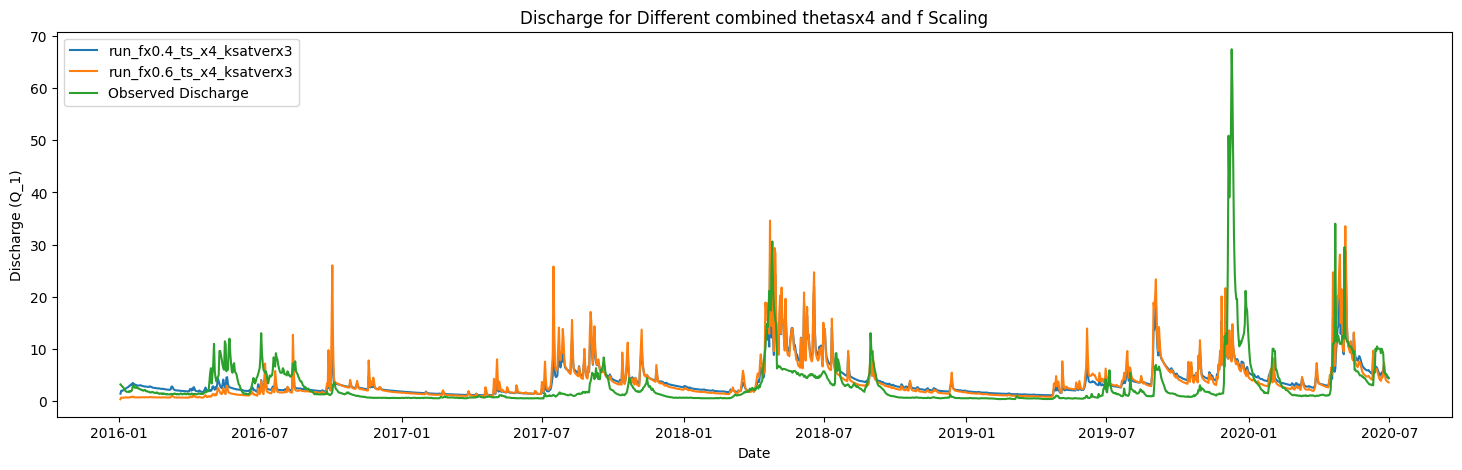

In [21]:
run_list = ["run_fx0.4_ts_x4_ksatverx3", "run_fx0.6_ts_x4_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
#output_4_k = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    #output_4_ksatver.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Egerton_2fc19_short.index, Egerton_2fc19_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Egerton_2fc19_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
print(f'The sum of the modeled discharge is {output_def["Q_1"]["2017-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for Different combined thetasx4 and f Scaling")
plt.show()

## Increasing Theta S

Based on the results displayed above, The baseflow in the model is still too high, as is the cumulative discharge. Therefore, Theta S will be increased further in the following simulations. To make sure the peaks in the model will not diminish completely, f is scaled up a bit. Ksatver is chosen at 3 times the initial value for these simulation:
1. f*0.6 theta s *5,6,7 ksatver *3
2. f*0.7 theta s *5,6,7 ksatver *3

The simulation period is increased from 2016-2020 to 2014-2020. Therefore, the default run and Observed Discharge Timeseries have to be modified again.

In [22]:
run_default = 'run_default'

default_run = pd.read_csv(os.path.join(path, run_default, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
default_run = default_run.loc[default_run.index <= "2020-06-30"]

Q_obs = pd.read_excel(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\daily_discharge.xlsx")

Q_obs.set_index('date', inplace=True)
Q_obs = Q_obs.rename(columns={'daily_discharge' : 'Discharge (m3/s) 2FC19'})


Q_obs_short = Q_obs.loc[Q_obs.index >= '2014-01-01']

display(Q_obs_short)

,Discharge (m3/s) 2FC19
date,
2014-01-01,5.687392
2014-01-02,5.408654
2014-01-03,5.140953
2014-01-04,4.883958
2014-01-05,4.637344
...,...
2020-06-26,5.140952
2020-06-27,5.140952
2020-06-28,4.883957


### 1. f*0.6 theta s *5,6,7 ksatver *3

The sum of the modeled discharge of run_fx0.6_ts_x5_ksatverx3 is 5.81e+08 m3
The sum of the modeled discharge of run_fx0.6_ts_x6_ksatverx3 is 5.53e+08 m3
The sum of the modeled discharge of run_fx0.6_ts_x7_ksatverx3 is 5.21e+08 m3
The sum of the observed discharge is 4.01e+08 m^3.


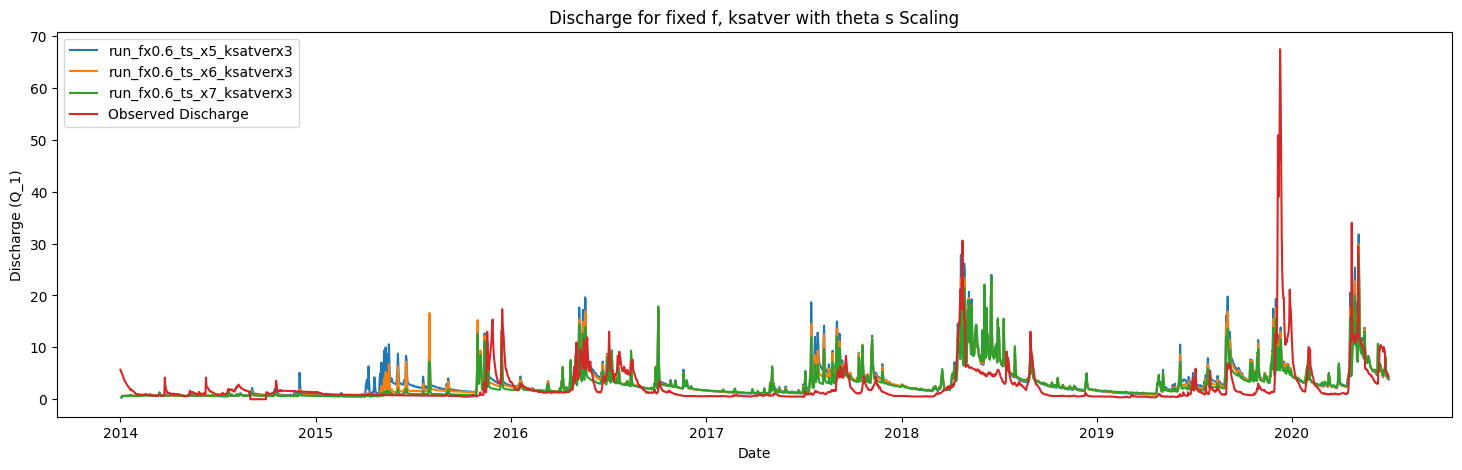

In [23]:
run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3", "run_fx0.6_ts_x7_ksatverx3"]
#run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_incr_thetas_1 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_thetas_1.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short.index, Q_obs_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fixed f, ksatver with theta s Scaling")
plt.show()

In [24]:
# plt.plot(output_incr_thetas_1[2]['WL_1'][:'2018-01-01'])

### 2. f *0.7 theta s *5,6,7 ksatver *3

The sum of the modeled discharge of run_fx0.7_ts_x5_ksatverx3 is 5.75e+08 m3
The sum of the modeled discharge of run_fx0.7_ts_x6_ksatverx3 is 5.50e+08 m3
The sum of the modeled discharge of run_fx0.7_ts_x7_ksatverx3 is 5.21e+08 m3
The sum of the observed discharge is 4.01e+08 m^3.


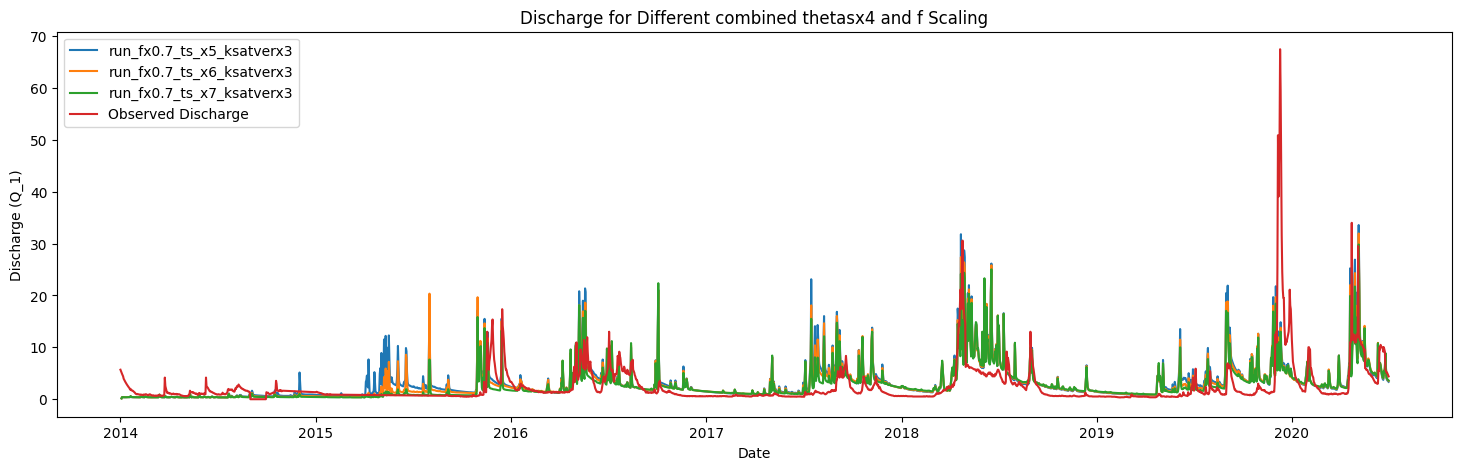

In [25]:
run_list = ["run_fx0.7_ts_x5_ksatverx3", "run_fx0.7_ts_x6_ksatverx3", "run_fx0.7_ts_x7_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_incr_thetas_2 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_thetas_2.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short.index, Q_obs_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for Different combined thetasx4 and f Scaling")
plt.show()

## Fixed f, ksathorfrac. Scaling for theta s

Ksathorfrac*0.1 shows good overlap in baseflow. Therefore, theta_s is increased to decrease peaks and cumulative discharge. f is taken *0.4 and *0.5.

### 3. f*0.5 ksathorfrac *0.1 theta_s *5,6,7

The sum of the modeled discharge of run_fx0.5_ts_x5_ksathorx0.1 is 5.40e+08 m3
The sum of the modeled discharge of run_fx0.5_ts_x6_ksathorx0.1 is 5.22e+08 m3
The sum of the modeled discharge of run_fx0.5_ts_x7_ksathorx0.1 is 5.03e+08 m3
The sum of the observed discharge is 4.01e+08 m^3.


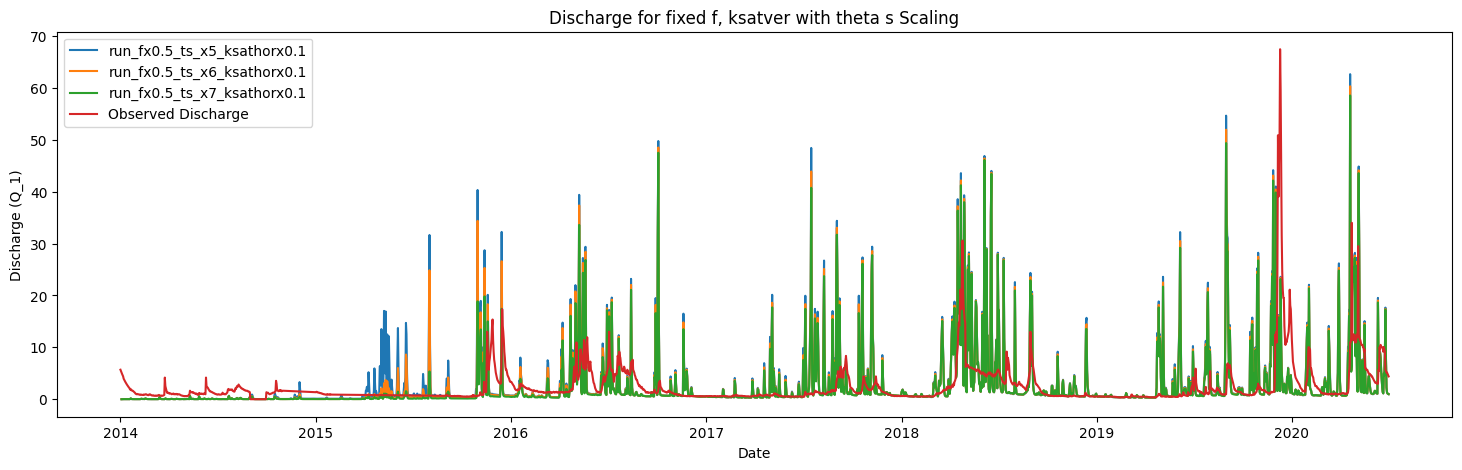

In [26]:
run_list = ["run_fx0.5_ts_x5_ksathorx0.1", "run_fx0.5_ts_x6_ksathorx0.1", "run_fx0.5_ts_x7_ksathorx0.1"]
#run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]

#run_list = ["run_fx0.5_ts_x5_ksathorx0.1", "run_fx0.4_ts_x5_ksathorx0.1"]
output_incr_thetas_3 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_thetas_3.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short.index, Q_obs_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fixed f, ksatver with theta s Scaling")
plt.show()

### 4. f *0.4 ksathorfrac *0.1 and theta_s *5,6,7

The sum of the modeled discharge of run_fx0.4_ts_x5_ksathorx0.1 is 5.38e+08 m3
The sum of the modeled discharge of run_fx0.4_ts_x6_ksathorx0.1 is 5.20e+08 m3
The sum of the modeled discharge of run_fx0.4_ts_x7_ksathorx0.1 is 4.72e+08 m3
The sum of the observed discharge is 4.01e+08 m^3.


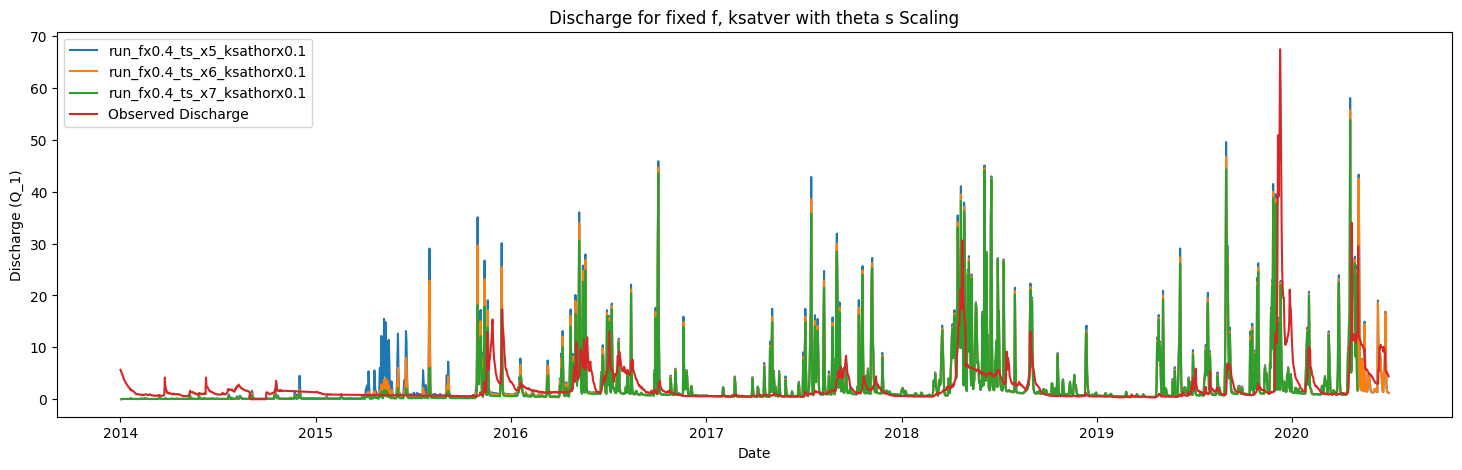

In [27]:
run_list = ["run_fx0.4_ts_x5_ksathorx0.1", "run_fx0.4_ts_x6_ksathorx0.1", "run_fx0.4_ts_x7_ksathorx0.1"]
#run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_incr_thetas_4 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_thetas_4.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short.index, Q_obs_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fixed f, ksatver with theta s Scaling")
plt.show()

### 5. f*0.3 ksathorfrac *0.1 and theta_s *5,6,7

The sum of the modeled discharge of run_fx0.3_ts_x5_ksathorx0.1 is 5.33e+08 m3
The sum of the modeled discharge of run_fx0.3_ts_x6_ksathorx0.1 is 5.11e+08 m3
The sum of the modeled discharge of run_fx0.3_ts_x7_ksathorx0.1 is 0.00e+00 m3
The sum of the observed discharge is 4.01e+08 m^3.


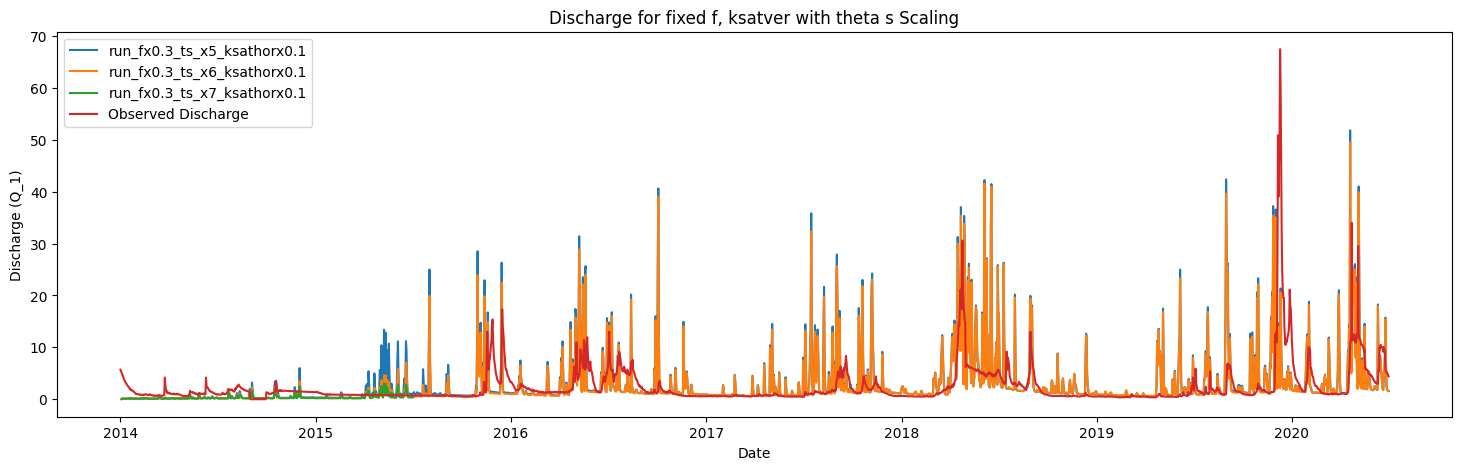

In [28]:
run_list = ["run_fx0.3_ts_x5_ksathorx0.1", "run_fx0.3_ts_x6_ksathorx0.1", "run_fx0.3_ts_x7_ksathorx0.1"]
#run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_incr_thetas_5 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_thetas_5.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short.index, Q_obs_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fixed f, ksatver with theta s Scaling")
plt.show()

### 6. f *0.2 ksathorfrac *0.1 theta_s * 5,6,7

The sum of the modeled discharge of run_fx0.6_ts_x5_ksatverx3 is 5.81e+08 m3
The sum of the modeled discharge of run_fx0.6_ts_x6_ksatverx3 is 5.53e+08 m3
The sum of the observed discharge is 4.01e+08 m^3.


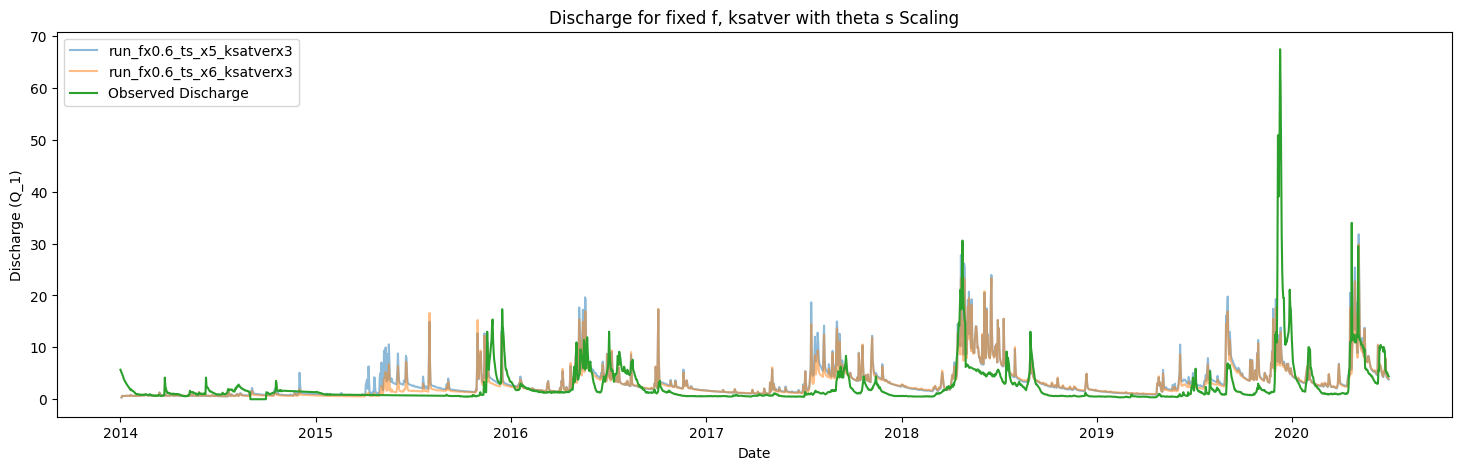

In [29]:
run_list = ["run_fx0.2_ts_x5_ksathorx0.1", "run_fx0.2_ts_x6_ksathorx0.1", "run_fx0.2_ts_x7_ksathorx0.1"]
#run_list = ["run_fx0.2_ts_x5_ksathorx0.1", "run_fx0.2_ts_x6_ksathorx0.1"]
run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_incr_thetas_6 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_thetas_6.append(df)
    plt.plot(df.index, df['Q_1'], alpha=0.5, label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short.index, Q_obs_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fixed f, ksatver with theta s Scaling")
plt.show()

## Lowering the peaks with Ksatver

For the different values of f (*0.6 - 0.2) the modeled discharge keeps showing too many peaks. The peaks need to be lowered, without increasing the baseflow too much. From experience, increasing ksatver does lower the peaks without increasing the baseflow a lot. Therefore, simulations will be carried out for different values of ksatver, combined with:
1. f *0.4, theta_s *6 and ksathorfrac *0.1 (ksatver *3,4,5)

The sum of the modeled discharge of run_fx0.4_ts_x6_kh_x0.1_kvx3 is 5.41e+08 m3
The sum of the modeled discharge of run_fx0.4_ts_x6_kh_x0.1_kvx4 is 5.50e+08 m3
The sum of the modeled discharge of run_fx0.4_ts_x6_kh_x0.1_kvx5 is 5.59e+08 m3
The sum of the observed discharge is 4.01e+08 m^3.


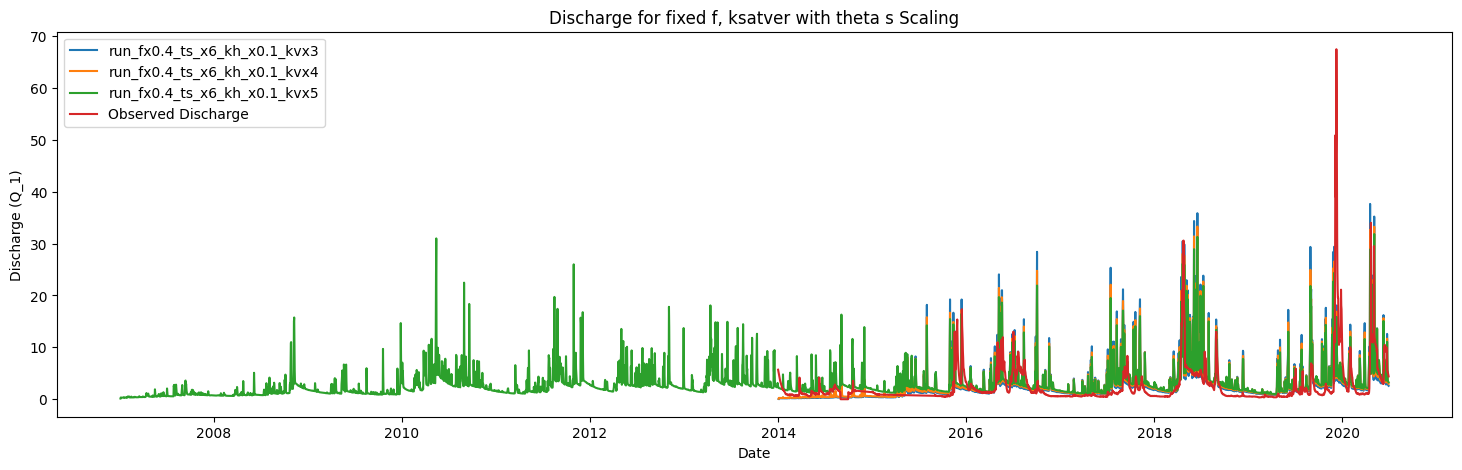

In [30]:
run_list = ["run_fx0.4_ts_x6_kh_x0.1_kvx3", "run_fx0.4_ts_x6_kh_x0.1_kvx4", "run_fx0.4_ts_x6_kh_x0.1_kvx5"]
#run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_incr_ksatver_1 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_ksatver_1.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short.index, Q_obs_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fixed f, ksatver with theta s Scaling")
plt.show()

### Theta_s 

The peaks are not lowered enough with ksatver, and the baseflow stays too high. To lower the peaks and the baseflow further, theta_s is increased

### 6. f *0.4, ksathorfrac *0.1, ksatver *5 and theta_s *7,8

The sum of the modeled discharge of run_fx0.4_ts_x7_kh_x0.1_kvx5 is 5.33e+08 m3
The sum of the modeled discharge of run_fx0.4_ts_x8_kh_x0.1_kvx5 is 5.23e+08 m3
The sum of the observed discharge is 4.01e+08 m^3.


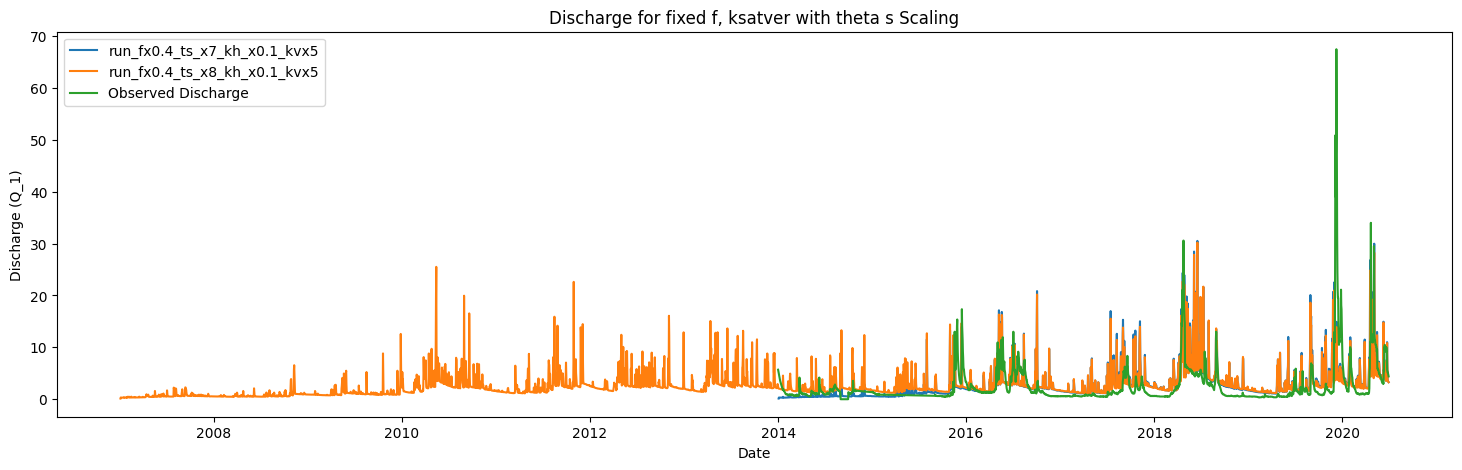

In [31]:
run_list = ["run_fx0.4_ts_x7_kh_x0.1_kvx5", "run_fx0.4_ts_x8_kh_x0.1_kvx5"]
#run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_incr_ksatver_2 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_ksatver_2.append(df)
    plt.plot(df.index, df['Q_1'], label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short.index, Q_obs_short['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fixed f, ksatver with theta s Scaling")
plt.show()

### 7. f*0.6 ksathorfrac *0.2 kv *3 theta_s *9,10

Because the hydrograph remains to sensitive in peak flows, ksathorfrac will be adjusted to *0.2 instead of *0.1. This will likely result in lower and less peaks. f is increased by a little, to try and maintain the low baseflows. Increasing theta_s even further is likely to further reduce the cumulative discharge. 

The sum of the modeled discharge of run_fx0.6_ts_x5_ksatverx3 is 5.81e+08 m3
The sum of the modeled discharge of run_fx0.6_ts_x6_ksatverx3 is 5.53e+08 m3
The sum of the observed discharge is 4.01e+08 m^3.


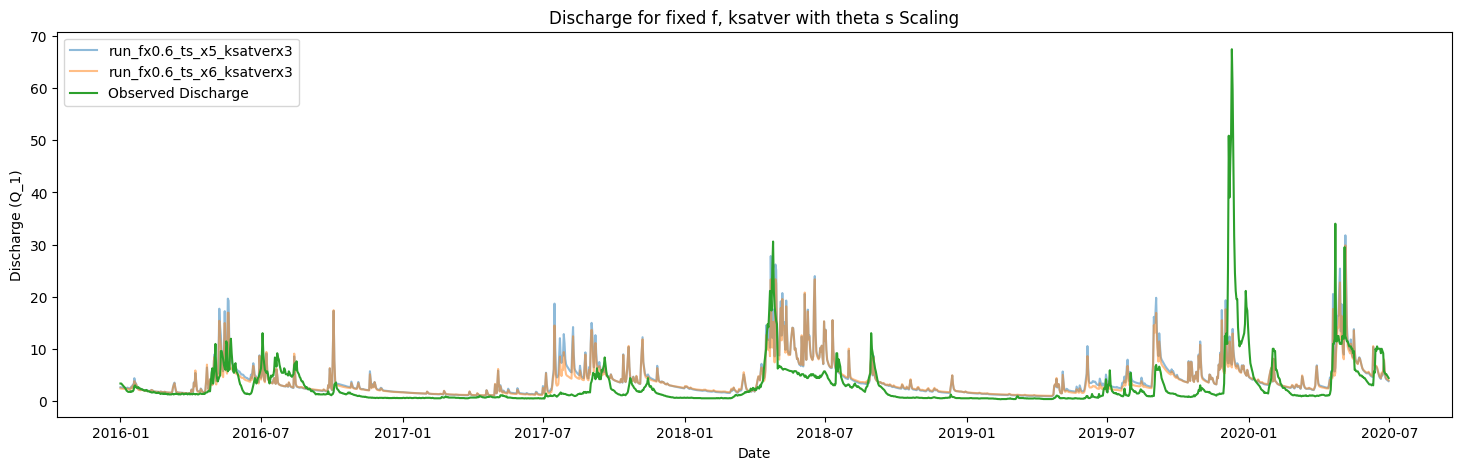

In [32]:
run_list = ["run_fx0.6_tsx10_kh_x0.2_kvx3", "run_fx0.6_tsx9_kh_x0.2_kvx3"]
#run_list = ["run_fx0.6_tsx10_kh_x0.2_kvx3"]
run_list = ["run_fx0.6_ts_x5_ksatverx3", "run_fx0.6_ts_x6_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4"]
output_incr_ksatver_3 = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(18, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_incr_ksatver_3.append(df)
    plt.plot(df['2016-01-01':].index, df['2016-01-01':]['Q_1'], alpha=0.5, label=run)
    print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2016-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def.index, output_def['Q_1'], label='default run')
plt.plot(Q_obs_short['2016-01-01':].index, Q_obs_short['2016-01-01':]['Discharge (m3/s) 2FC19'], label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2016-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

plt.xlabel("Date")
plt.ylabel("Discharge (Q_1)")
plt.legend()
plt.title("Discharge for fixed f, ksatver with theta s Scaling")
plt.show()

## Find optimal values for combination of f and ksatver

The sum of the observed discharge is 3.14e+08 m^3.


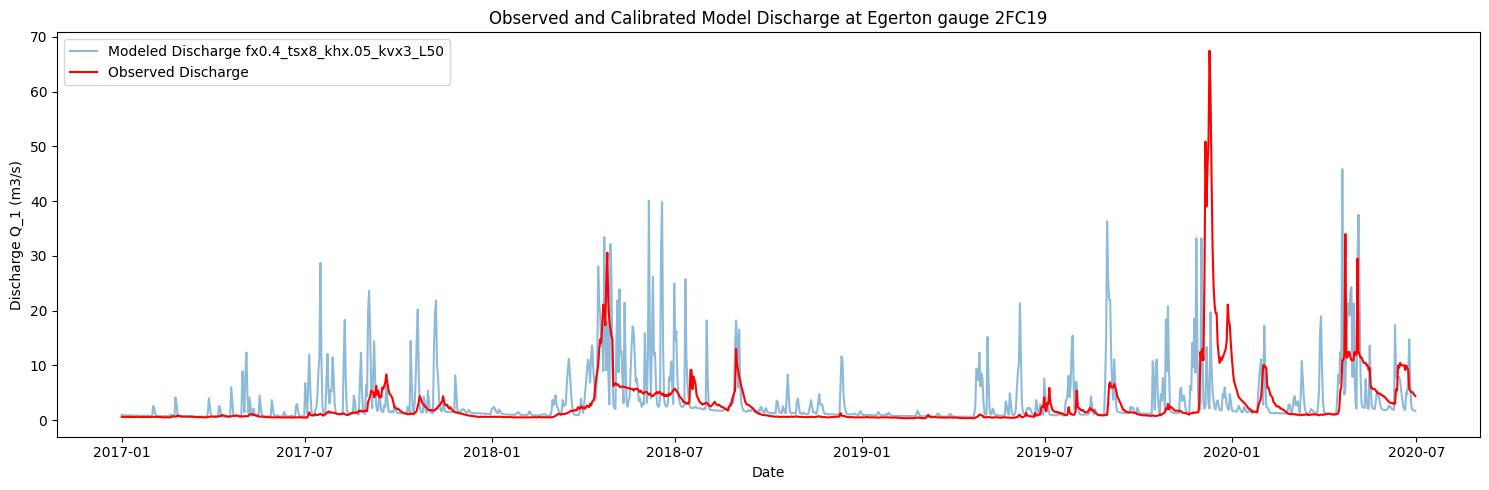

<Figure size 640x480 with 0 Axes>

In [33]:
#run_list = ["run_fx0.2_ksatver_x2", "run_fx0.2_ksatver_x3", "run_fx0.2_ksatver_x4", "run_fx0.2_ksatver_x5"]
#run_list = ["run_fx0.4_ksatver_x2", "run_fx0.5_ksatver_x2", "run_fx0.6_ksatver_x2"]	
#run_list = ["run_fx0.3_ksatver_x2", "run_fx0.3_ksatver_x3", "run_fx0.3_ksatver_x4", "run_fx0.3_ksatver_x5"]
run_list = ["run_fx0.4_ksatver_x2", "run_fx0.4_ksatver_x3", "run_fx0.4_ksatver_x4", "run_fx0.4_ksatver_x5"]
#run_list = ["run_fx0.5_ksatver_x2", "run_fx0.5_ksatver_x3", "run_fx0.5_ksatver_x4", "run_fx0.5_ksatver_x5"]
#run_list = ["run_fx0.6_ksatver_x2", "run_fx0.6_ksatver_x3", "run_fx0.6_ksatver_x4", "run_fx0.6_ksatver_x5"]
run_list = ["run_fx0.2_ksatver_x3", "run_fx0.3_ksatver_x3", "run_fx0.4_ksatver_x3", "run_fx0.5_ksatver_x3"]
#run_list = ["run_fx0.5_ksatver_x5", "run_fx0.6_ksatver_x5"]
#run_list = ["run_fx0.6_ksatver_x5", "run_fx0.6_ksatver_x2"]
#run_list = ["run_fx0.6_ksatver_x5_kh_x10", "run_fx0.6_ksatver_x5_kh_x2"]
#run_list = ["run_fx0.25_ts_x5_ksathorx10", "run_fx0.25_ts_x5_kh_x10_kvx4", "run_fx0.3_ts_x5_kh_x10_kvx4", "run_fx0.35_ts_x5_kh_x10_kvx4"]
#run_list = ["run_fx0.25_ts_x5_khx10_v2", "run_fx0.35_tsx5_khx10_kvx4"]
#run_list = ["run_fx0.25_ts_x5_khx10_v2"]
#run_list = ["run_fx0.25_ts_x5_kh_x10_kvx4", "run_fx0.35_ts_x5_kh_x10_kvx4", "run_fx0.4_ts_x5_kh_x10_kvx4"]
#run_list = ["run_fx0.35_ts_x5_kh_x10_kvx4", "run_fx0.4_ts_x5_kh_x10_kvx4"]
#run_list = ["run_fx0.25_ts_x5_kh_x10_kvx4", "run_fx0.4_ts_x5_kh_x10_kvx4"]
#run_list = ["run_fx0.35_tsx5_khx10_kvx4"]
#run_list = ["run_fx0.25_ts_x5_kh_x10_kvx4"]
#run_list = ["run_fx0.3_thetas_x4", "run_fx0.2_thetas_x4"]
#run_list = ["run_fx0.2_tsx5_khx10_kvx4", "run_fx0.35_tsx5_khx10_kvx4"]
#run_list = ["run_fx0.2_tsx5_khx10_kvx4"]
#run_list = ["run_fx0.5_ts_x5_ksatverx3"]
#run_list = ["run_fx0.5_ts_x5_ksatverx3"]
#run_list = ["run_fx0.2_thetas_x4", "run_fx0.2_thetas_x3"]
#run_list = ["run_fx0.1"]
#run_list = ["run_fx0.25_ts_x5_ksatverx4"]
#run_list = ["run_fx0.2_ts_x4_ksathorx0.5", "run_fx0.4_ts_x6_kh_x0.1_kvx5", "run_fx0.4_ts_x8_kh_x0.1_kvx5"]
#run_list = ["run_fx0.4_ts_x6_kh_x0.1_kvx5"]
#run_list = ["run_fx0.25_thetas_x4"]
# run_list = ["run_fx0.2_ts_x4_ksathorx0.5"]
# run_list = ["runfx0.25_tsx5_khx10_kvx4_L1", "runfx0.25_tsx5_khx10_kvx4_L2"]
# run_list = ["runfx0.25_tsx5_khx10_kvx4_L1","runfx0.25_tsx5_khx10_kvx4L10", "runfx0.25_tsx5_khx10_kvx4L15"]
#run_list = ["runfx0.4_tsx8_khx.1_kvx5_L10", "runfx0.4_tsx8_khx.1_kvx5_L15"]
#run_list = ["runfx0.4_tsx8_khx2_kvx3_L10"]
run_list = ["run_fx0.4_ts_x4_ksatverx3", "run_fx0.5_ts_x4_ksatverx3", "run_fx0.6_ts_x4_ksatverx3"]
#run_list = ["runfx0.4_tsx8_khx.1_kvx3_L10", "runfx0.4_tsx8_khx.1_kvx3_L15", "runfx0.4_tsx8_khx.1_kvx3_L20"]
#run_list = ["runfx0.4_tsx8_khx.1_kvx3_L15" , "runfx0.4_tsx8_khx.1_kvx5_L15"]
#run_list = ["fx0.4_tsx8_khx.05_kvx2_L10", "fx0.4_tsx8_khx.05_kvx2_L15"]
#run_list = ["fx0.4_tsx8_khx.05_kvx3_L20", "fx0.4_tsx8_khx.05_kvx3_L20v2", "run_fx0.35_tsx5_khx10_kvx4", "fx0.35_tsx5_khx10_kvx4_L20v2"]
#run_list =["fx0.4_tsx8_khx.05_kvx3_L20", "fx0.35_tsx5_khx10_kvx4_L20v2"]
run_list = ["fx0.4_tsx8_khx.05_kvx3_L50"]

output_f_ksatver = []

end_date = pd.to_datetime("2020-06-30")

plt.figure(figsize=(15, 5))

for run in run_list:
    df = pd.read_csv(os.path.join(path, run, "output.csv"), sep=",", header=0, index_col=0, parse_dates=True)
    df = df[df.index <= end_date]  # Filter to end date
    output_f_ksatver.append(df)
    plt.plot(df["2017-01-01":].index, df["2017-01-01":]['Q_1'], alpha=0.5, label=f'Modeled Discharge {run}')
    #plt.plot(df["2016-01-01":].index, df["2016-01-01":]['Q_1'].rolling(window=5).mean(), alpha=0.5, label=f'Rolling 5 day mean {run}')
    #print(f'The sum of the modeled discharge of {run} is {df["Q_1"]["2017-01-01":].sum()*86400:.2e} m3')

#plt.plot(output_def["2016-01-01":].index, output_def["2016-01-01":]['Q_1'].rolling(window=14).mean(), label='Modeled Discharge, rolling 14-day mean')
#plt.plot(output_def["2017-01-01":].index, output_def["2017-01-01":]['Q_1'], label='Modeled Discharge, default run')
plt.plot(Q_obs["2017-01-01":].index, Q_obs["2017-01-01":]['Discharge (m3/s) 2FC19'], color='red' , label='Observed Discharge')  
print(f'The sum of the observed discharge is {Q_obs_short["2017-01-01":].values.sum()*86400:.2e} m^3.')
#print(f'The sum of the modeled discharge is {default_run["Q_1"]["2016-01-01":].values.sum()*86400:.2e} m^3.')

#output_f_ksatver[0].to_csv(os.path.join(path, "output_fx0.4_ts_x8_kh_x0.05_kvx3_L5_2007_2021.csv"))
output_def.to_csv(os.path.join(path, "output_default_2007_2021.csv"))
Q_obs.to_csv(os.path.join(path, "Q_obs_2007_2021.csv"))

plt.xlabel("Date")
plt.ylabel("Discharge Q_1 (m3/s)")
plt.legend()
#plt.title("Discharge at Egerton gauge 2FC19 for f *0.40, Theta S *8, KsatHorFrac *0.05 and KsatVer *3 and MaxLeakage = 5 mm/day")
plt.title("Observed and Calibrated Model Discharge at Egerton gauge 2FC19")
#plt.show()
plt.tight_layout()

plt.savefig(os.path.join(path, "Obsevered_and_Final_Calibrated_Model_Discharge_2FC19_.png"), dpi=300)
plt.show()
plt.tight_layout()

In [34]:
# After plt.savefig(...) and plt.show()

# Calculate sum for observed discharge
sum_observed = Q_obs_short['2017-01-01':]['Discharge (m3/s) 2FC19'].sum() * 86400  # m3

# Calculate sum for each modeled run in run_list
sum_modeled = []
for df, run in zip(output_f_ksatver, run_list):
    s = df['2017-01-01':]['Q_1'].sum() * 86400  # m3
    sum_modeled.append((run, s))

# Prepare DataFrame
rows = [('Observed', sum_observed)] + sum_modeled
df_sum = pd.DataFrame(rows, columns=['Run', 'Sum_Discharge_m3'])

# Save to CSV with the same name as the PNG
csv_path = os.path.join(path, "Obsevered_and_Calibrated_ksatver_f__thetas_vary_f_Discharge_2FC19_.csv")
df_sum.to_csv(csv_path, index=False)
print(f"Saved discharge sums to {csv_path}")

Saved discharge sums to C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\Nakuru_res0.002dg_complete_chirps\Obsevered_and_Calibrated_ksatver_f__thetas_vary_f_Discharge_2FC19_.csv


## Calculating the NSE values for observed vs modeled discharge

In [35]:
import pandas as pd
import numpy as np

def calculate_nse(observed, simulated):
    """
    Calculate Nash-Sutcliffe Efficiency (NSE) between observed and simulated data.
    
    Parameters:
    - observed: array-like, observed discharge values
    - simulated: array-like, simulated discharge values
    
    Returns:
    - NSE value
    """
    observed = np.array(observed)
    simulated = np.array(simulated)

    # Mask invalid values
    mask = ~np.isnan(observed) & ~np.isnan(simulated)
    observed = observed[mask]
    simulated = simulated[mask]

    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - np.mean(observed)) ** 2)

    if denominator == 0:
        raise ValueError("Denominator zero - observed discharge is constant.")

    nse = 1 - (numerator / denominator)
    return nse

# === Example ===
# Suppose you have two CSV files: observed.csv and simulated.csv
# Both have columns: 'date', 'discharge'

# Load data
observed_df = Q_obs_short['2016-01-01':]
simulated_df = output_f_ksatver[0]['2016-01-01':].rolling(window=14).mean()
#simulated_df = 

# Merge on date
#merged = pd.merge(observed_df, simulated_df, on=observed_df.index)
merged = pd.merge(observed_df, simulated_df, left_index=True, right_index=True)
#display(merged)
# Calculate NSE
nse_value = calculate_nse(merged['Discharge (m3/s) 2FC19'], merged['Q_1'])

print(f"Nash-Sutcliffe Efficiency (NSE): {nse_value:.3f}")

Nash-Sutcliffe Efficiency (NSE): 0.299


In [36]:
# plt.plot(output_f_ksatver[0]['WL_1'])
# display(output_f_ksatver[0])

In [37]:
water_level = pd.read_excel(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-03-05 WRA data\2FC19 NJORO RIVER - Water Levels.xlsx", skiprows=1)

In [38]:
water_level.set_index('Date', inplace=True)


water_level.index = pd.to_datetime(water_level.index, format='%d/%m%Y %H:%M')

In [39]:
water_level = water_level.resample('D').mean()
# #display(water_level)
# #plt.figure(figsize=(18, 5))
# plt.subplots(2,1, sharex=True, figsize=(18, 10))
# plt.subplot(2,1,1)
# plt.plot(water_level['2016-01-01':].index, water_level['2016-01-01':]['2FC19 NJORO RIVER - Water Levels'], label='Observed Water Level')
# plt.subplot(2,1,2)
# plt.plot(Q_obs_short['2016-01-01':].index, Q_obs_short['2016-01-01':], label='Simulated Water Level')

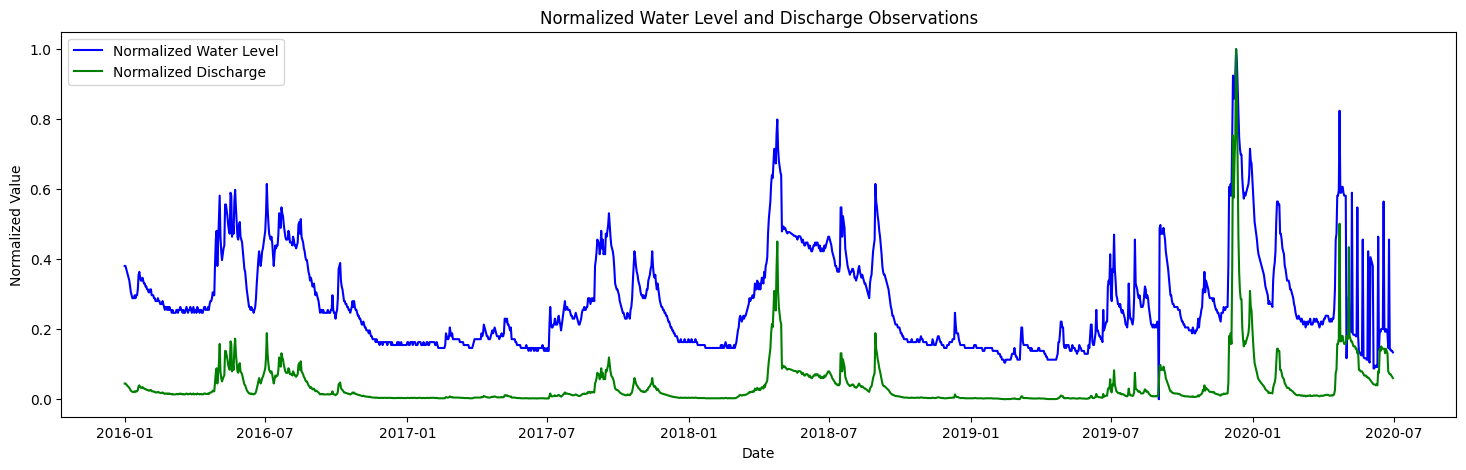

<Figure size 640x480 with 0 Axes>

In [40]:
# Normalize the data to a range of 0 to 1
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize water level and discharge observations
normalized_water_level = normalize(water_level['2016-01-01':]['2FC19 NJORO RIVER - Water Levels'])
normalized_discharge = normalize(Q_obs_short['2016-01-01':]['Discharge (m3/s) 2FC19'])

# Plot both normalized datasets on the same graph
plt.figure(figsize=(18, 5))
plt.plot(normalized_water_level.index, normalized_water_level, label='Normalized Water Level', color='blue')
plt.plot(normalized_discharge.index, normalized_discharge, label='Normalized Discharge', color='green')
plt.legend()
plt.title('Normalized Water Level and Discharge Observations')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.show()

plt.savefig(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\Normalized_discharge_and_waterlevel.png", dpi=300, bbox_inches='tight')
plt.show()

In [42]:
discharge = 1.9 * 15 * (water_level-0.5)**(2.5)

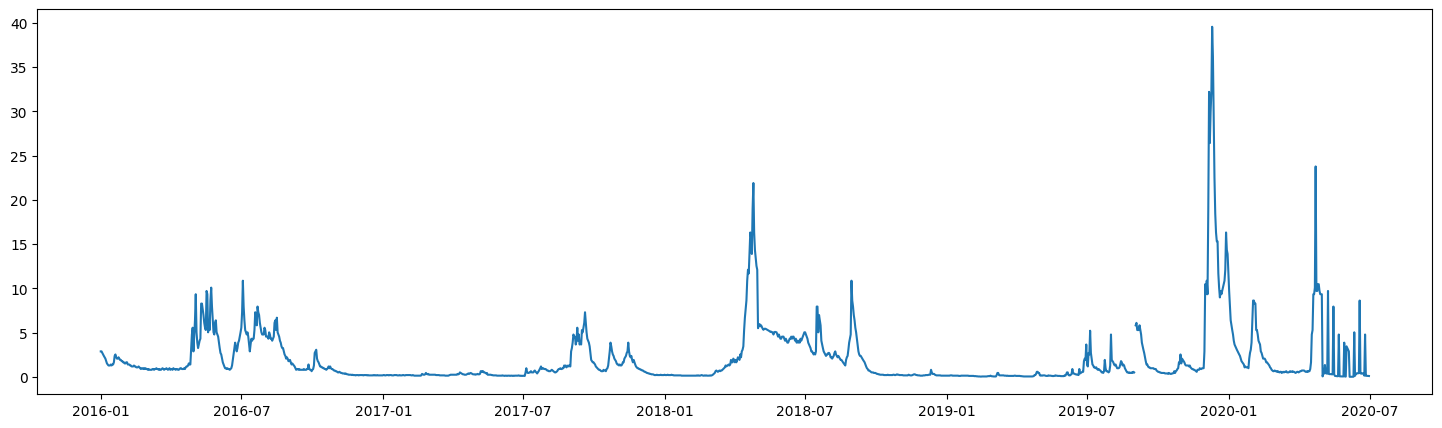

In [43]:
plt.figure(figsize=(18, 5))
plt.plot(discharge['2016-01-01':].index, discharge['2016-01-01':], label='Discharge from Water Level')